In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc

In [3]:

# Load the dataset
df = pd.read_csv('../../../data/XAUUSD_2010-2023.csv').head(1000)

In [4]:

# Convert the 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Select relevant features for clustering
features = [
    'open',
    'high',
    'low',
    'close',
    # 'rsi14',
    'sma14'
]
X = df[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized)


In [5]:
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

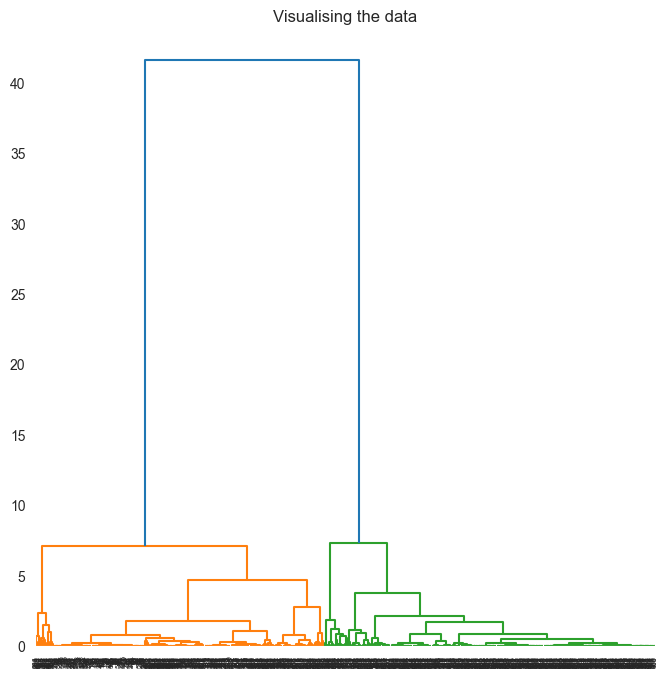

In [6]:
plt.figure(figsize=(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((
    shc.linkage(
        X_principal,
        method='ward'
    )
)
)

In [8]:

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(
    n_clusters=4
)
df['Cluster'] = agglo.fit_predict(X_scaled)

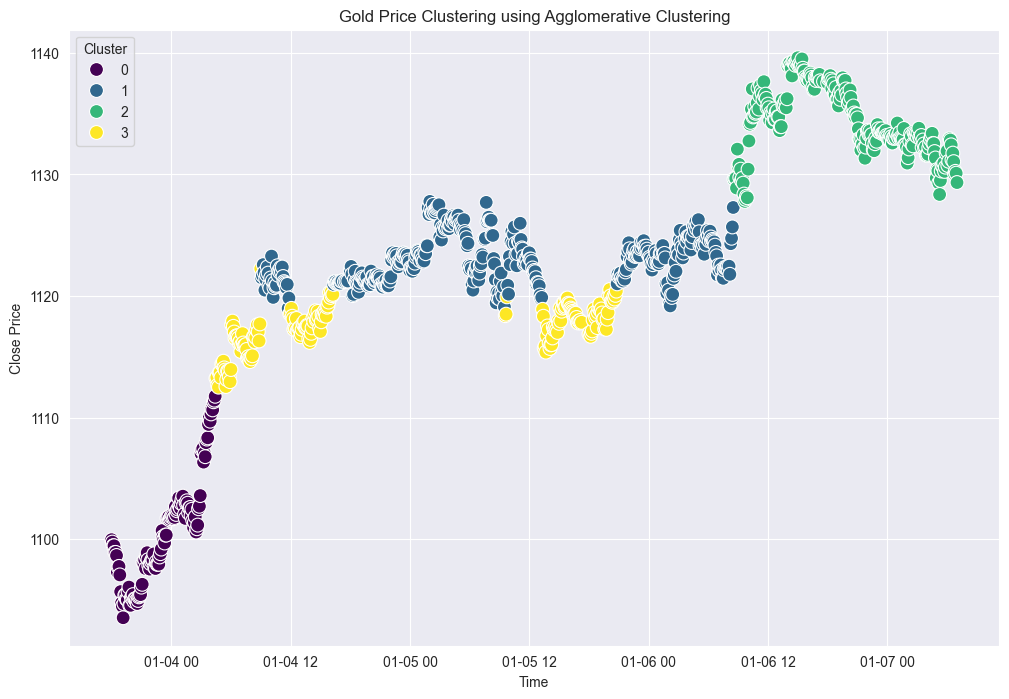

In [10]:

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df,
                x='time',
                y='close',
                hue='Cluster',
                palette='viridis',
                s=100)
plt.title('Gold Price Clustering using Agglomerative Clustering')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend(title='Cluster')
plt.show()
